## USB-IDS1 Dataset Analysis

* **Author:** Patrik Goldschmidt (igoldschmidt@fit.vut.cz)
* **Project:** Network Intrusion Datasets: A Survey, Limitations, and Recommendations
* **Date:** 2024

Dataset source: [https://idsdata.ding.unisannio.it/usbids1.html](https://idsdata.ding.unisannio.it/usbids1.html)

In [1]:
import pandas as pd
import pathlib
import numpy as np
import os

pd.set_option('display.max_columns', None)

In [2]:
# Originally, there are 4 attacks in 4 defensive setups (16 scenarios) per 10 minutes
# + a REGULAR.csv file formed of a normative (benign) traffic.
DATA_DIR = '/data/datasets_cic/usb_ids'

In [3]:
# Attacks would be normally loaded 1-by-1, but merge them for this analysis purposes
data_regular = pd.read_csv(os.path.join(DATA_DIR, 'REGULAR.csv'))
data_attacks = pd.DataFrame()

for file in pathlib.Path(DATA_DIR).glob('*.csv'):
    if file.name != 'REGULAR.csv':
        data_attacks = pd.concat([data_attacks, pd.read_csv(file)])


In [4]:
data_regular.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305921 entries, 0 to 305920
Data columns (total 84 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     305921 non-null  object 
 1   Src IP                      305921 non-null  object 
 2   Src Port                    305921 non-null  int64  
 3   Dst IP                      305921 non-null  object 
 4   Dst Port                    305921 non-null  int64  
 5   Protocol                    305921 non-null  int64  
 6   Timestamp                   305921 non-null  object 
 7   Flow Duration               305921 non-null  int64  
 8   Total Fwd Packet            305921 non-null  int64  
 9   Total Bwd packets           305921 non-null  int64  
 10  Total Length of Fwd Packet  305921 non-null  float64
 11  Total Length of Bwd Packet  305921 non-null  float64
 12  Fwd Packet Length Max       305921 non-null  float64
 13  Fwd Packet Len

In [5]:
len(data_regular)

305921

In [6]:
data_regular.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,*.*.*.*-*.*.*.*-0-0-0,*.*.*.*,0,*.*.*.*,0,0,04/06/2021 09:26:53 PM,119597834,268,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,2.240843,4.479320e+05,5.472610e+05,2319686.0,3.0,119597834.0,4.479320e+05,5.472610e+05,2319686.0,3.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,2.240843,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
1,0.0.0.0-255.255.255.255-68-67-17,0.0.0.0,68,255.255.255.255,67,17,04/06/2021 09:26:52 PM,119255943,66,0,19800.0,0.0,300.0,300.0,300.000000,0.00000,0.0,0.0,0.000000,0.000000,166.029462,0.553432,1.834707e+06,1.778100e+06,7676112.0,8838.0,119255943.0,1.834707e+06,1.778100e+06,7676112.0,8838.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,528,0,0.553432,0.000000,300.0,300.0,300.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.00000,300.000000,300.000000,0.000000,1200,4,990,0,0,0,1,300,0,0,0,0,65,8,15575081.0,7.275798e+06,24705298.0,7259865.0,6549758.5,1.000018e+06,7676112.0,5418107.0,BENIGN
2,*.*.*.*-*.*.*.*-0-0-0,*.*.*.*,0,*.*.*.*,0,0,04/06/2021 09:26:54 PM,114831966,13,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.113209,9.569330e+06,2.970461e+05,9975997.0,9048001.0,114831966.0,9.569330e+06,2.970461e+05,9975997.0,9048001.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.113209,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.000000e+00,0.0,0.0,9569330.5,2.970461e+05,9975997.0,9048001.0,BENIGN
3,*.*.*.*-192.168.111.66-52691-22-6,*.*.*.*,52691,192.168.111.66,22,6,04/06/2021 09:26:56 PM,8502164,32,17,960.0,1216.0,64.0,0.0,30.000000,32.44847,144.0,64.0,71.529412,21.994652,255.934842,5.763239,1.771284e+05,5.608001e+05,3627894.0,169.0,8502164.0,2.742634e+05,6.820450e+05,3627894.0,571.0,8501417.0,531338.562500,888069.168758,3628481.0,7246.0,15,17,0,0,1024,544,3.763748,1.999491,0.0,144.0,44.408163,35.215952,1240.163265,0,0,0,32,49,0,0,0,0.53125,44.408163,30.000000,71.529412,0,0,0,0,0,0,0,19,0,24,395,313,14,32,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.111.66-*.*.*.*-22-48426-6,192.168.111.66,22,*.*.*.*,48426,6,04/06/2021 09:26:52 PM,104788614,110,110,7104.0,128.0,144.0,0.0,64.581818,13.17029,64.0,0.0,1.163636,8.590081,69.015132,2.099465,4.784868e+05,4.988308e+05,999708.0,17.0,104788166.0,9.613593e+05,1.879661e+05,1000136.0,183.0,104788112.0,961358.825688,186616.117125,1002013.0,605.0,108,2,0,0,3520,3520,1.049732,1.049732,0.0,144.0,32.872727,33.661791,1133.116148,0,0,0,110,220,0,0,0,1.00000,32.872727,64.581818,1.163636,0,0,0,0,0,0,0,32,0,0,313,1031,107,32,0.0,0.000

Apparently, a huge part of the IP data features is anonymized via asterisks (*), which is not very nice for processing as we lose a lot of information during that process, anonymization via prefix-preserventing methods would be more appropriate.

In [7]:
data_regular.describe()

/home/goldy/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/goldy/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,305921.000000,305921.000000,305921.000000,3.059210e+05,305921.000000,305921.000000,305921.000000,3.059210e+05,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,3.055060e+05,3.059210e+05,3.041640e+05,3.041640e+05,3.041640e+05,3.041640e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,305921.000000,305921.000000,305921.000000,305921.0,305921.0,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,3.059210e+05,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.0,305921.0,305921.0,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.00000,3.059210e+05,305921.000000,3.059210e+05,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,305921.000000,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05,3.059210e+05
mean,32368.847006,82.497684,6.088895,1.152793e+07,80.834199,117.429578,431.280366,3.304143e+05,79.802995,3.145047,12.075766,23.184735,6904.272371,0.075526,3144.476549,2400.643209,inf,inf,3.126659e+05,9.413627e+05,6.913225e+06,1.076117e+05,8.405033e+06,3.372452e+05,7.973485e+05,4.275526e+06,1.069801e+05,9.189874e+06,4.332944e+05,1.369157e+06,6.692474e+06,17.001478,4.145730,26.605686,0.0,0.0,2581.993874,3765.492961,66.471783,72.640763,3.145989,6907.439231,1519.044555,2242.893669,5.409896e+06,1.835824,1.939867,0.104292,30.751416,194.927370,0.0,0.0,0.0,0.983609,1519.044555,12.075766,3144.476549,7.664541,0.022254,24.43947,1.297131e+05,44.523511,1.011514e+07,0.029370,7.634791,0.000020,1510.462538,15576.894649,220.762726,4.508729,31.163993,2.068047e+06,8.916605e+04,2.179065e+06,1.994415e+06,6.444460e+06,1.477461e+05,6.557410e+06,6.336122e+06
std,19182.468727,278.523714,1.555741,1.946221e+07,129.319474,234.635062,1454.181307,6.131307e+05,25.025406,28.534172,28.137078,8.400259,1413.403666,2.884537,897.799762,804.853155,NaN,NaN,1.995436e+06,1.602960e+06,1.052648e+07,1.936503e+06,1.764916e+07,1.995981e+06,1.383792e+06,6.964661e+06,1.930956e+06,1.256229e+07,9.067663e+05,2.412744e+06,1.040432e+07,2556.941246,3.029785,45.883896,0.0,0.0,4242.371281,7508.451479,70.262658,96.060045,28.534860,1398.155340,434.190059,615.893613,2.210143e+06,0.445974,0.342574,0.305650,47.446597,362.535549,0.0,0.0,0.0,0.442335,434.190059,28.137078,897.799762,297.656597,0.647277,1962.46558,2.592692e+05,100.545104,1.370687e+07,0.168843,28.329104,0.004429,445.250469,2747.464294,134.092855,5.151284,4.797766,3.262914e+06,1.312258e+06,4.076868e+06,3.032749e+06,1.052053e+07,1.436931e+06

In [8]:
# Verify that the data are only benign
data_regular['Label'].value_counts()

Label
BENIGN    305921
Name: count, dtype: int64

In [9]:
# Filter out data containing *.*.*.* as IPs and see how big part it covers
data_regular_filt = data_regular[(data_regular['Src IP'] != '*.*.*.*') & (data_regular['Dst IP'] != '*.*.*.*')]

len(data_regular_filt) / len(data_regular)

0.014183400289617254

In [10]:
data_regular_filt.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1,0.0.0.0-255.255.255.255-68-67-17,0.0.0.0,68,255.255.255.255,67,17,04/06/2021 09:26:52 PM,119255943,66,0,19800.0,0.0,300.0,300.0,300.0,0.0,0.0,0.0,0.0,0.0,166.029462,0.553432,1.834707e+06,1.778100e+06,7676112.0,8838.0,119255943.0,1.834707e+06,1.778100e+06,7676112.0,8838.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,528,0,0.553432,0.0,300.0,300.0,300.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,300.0,300.0,0.0,1200,4,990,0,0,0,1,300,0,0,0,0,65,8,15575081.0,7.275798e+06,24705298.0,7259865.0,6.549758e+06,1.000018e+06,7676112.0,5418107.0,BENIGN
7,0.0.0.0-255.255.255.255-68-67-17,0.0.0.0,68,255.255.255.255,67,17,04/06/2021 09:28:57 PM,118876120,55,0,16500.0,0.0,300.0,300.0,300.0,0.0,0.0,0.0,0.0,0.0,138.799954,0.462667,2.201410e+06,1.850219e+06,8346380.0,14051.0,118876120.0,2.201410e+06,1.850219e+06,8346380.0,14051.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,440,0,0.462667,0.0,300.0,300.0,300.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,300.0,300.0,0.0,1200,4,1051,0,0,0,1,300,0,0,0,0,54,8,19480920.5,3.385259e+06,23841297.0,16393392.0,6.911067e+06,1.116955e+06,8346380.0,5933216.0,BENIGN
10,0.0.0.0-255.255.255.255-68-67-17,0.0.0.0,68,255.255.255.255,67,17,04/06/2021 09:31:04 PM,119205104,47,0,14100.0,0.0,300.0,300.0,300.0,0.0,0.0,0.0,0.0,0.0,118.283526,0.394278,2.591415e+06,2.160379e+06,8030541.0,1940.0,119205104.0,2.591415e+06,2.160379e+06,8030541.0,1940.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,376,0,0.394278,0.0,300.0,300.0,300.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,300.0,300.0,0.0,1200,4,1184,0,0,0,1,300,0,0,0,0,46,8,12355319.0,5.156335e+06,19955126.0,6144226.0,6.627291e+06,1.251105e+06,8030541.0,5002915.0,BENIGN
11,192.168.111.6-192.168.111.255-137-137-17,192.168.111.6,137,192.168.111.255,137,17,04/06/2021 09:28:58 PM,4011163,4,0,200.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,49.860851,0.997217,1.337054e+06,1.157029e+06,2005157.0,1032.0,4011163.0,1.337054e+06,1.157029e+06,2005157.0,1032.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,32,0,0.997217,0.0,50.0,50.0,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,50.0,50.0,0.0,0,0,0,0,0,0,1,50,0,0,0,0,3,8,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN
12,192.168.111.6-192.168.111.255-138-138-17,192.168.111.6,138,192.168.111.255,138,17,04/06/2021 09:29:02 PM,0,1,0,183.0,0.0,183.0,183.0,183.0,0.0,0.0,0.0,0.0,0.0,inf,inf,NaN,NaN,NaN,NaN,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,0,0.000000,0.0,183.0,183.0,183.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,183.0,183.0,0.0,0,0,0,0,0,0,1,183,0,0,0,0,0,8,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN


In [11]:
# Only 1% of data does not contain * IPs... Coes it mean the rest are anonymized?
data_regular_nofilt = data_regular[(data_regular['Src IP'] == '*.*.*.*') | (data_regular['Dst IP'] == '*.*.*.*')]

len(data_regular_nofilt) / len(data_regular)

0.9858165997103827

In [12]:
data_regular_nofilt.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,*.*.*.*-*.*.*.*-0-0-0,*.*.*.*,0,*.*.*.*,0,0,04/06/2021 09:26:53 PM,119597834,268,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,2.240843,4.479320e+05,547260.959914,2319686.0,3.0,119597834.0,4.479320e+05,547260.959914,2319686.0,3.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,2.240843,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN
2,*.*.*.*-*.*.*.*-0-0-0,*.*.*.*,0,*.*.*.*,0,0,04/06/2021 09:26:54 PM,114831966,13,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.113209,9.569330e+06,297046.125351,9975997.0,9048001.0,114831966.0,9.569330e+06,297046.125351,9975997.0,9048001.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.113209,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,9569330.5,297046.125351,9975997.0,9048001.0,BENIGN
3,*.*.*.*-192.168.111.66-52691-22-6,*.*.*.*,52691,192.168.111.66,22,6,04/06/2021 09:26:56 PM,8502164,32,17,960.0,1216.0,64.0,0.0,30.000000,32.44847,144.0,64.0,71.529412,21.994652,255.934842,5.763239,1.771284e+05,560800.064671,3627894.0,169.0,8502164.0,2.742634e+05,682045.029812,3627894.0,571.0,8501417.0,531338.562500,888069.168758,3628481.0,7246.0,15,17,0,0,1024,544,3.763748,1.999491,0.0,144.0,44.408163,35.215952,1240.163265,0,0,0,32,49,0,0,0,0.53125,44.408163,30.000000,71.529412,0,0,0,0,0,0,0,19,0,24,395,313,14,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN
4,192.168.111.66-*.*.*.*-22-48426-6,192.168.111.66,22,*.*.*.*,48426,6,04/06/2021 09:26:52 PM,104788614,110,110,7104.0,128.0,144.0,0.0,64.581818,13.17029,64.0,0.0,1.163636,8.590081,69.015132,2.099465,4.784868e+05,498830.801635,999708.0,17.0,104788166.0,9.613593e+05,187966.051198,1000136.0,183.0,104788112.0,961358.825688,186616.117125,1002013.0,605.0,108,2,0,0,3520,3520,1.049732,1.049732,0.0,144.0,32.872727,33.661791,1133.116148,0,0,0,110,220,0,0,0,1.00000,32.872727,64.581818,1.163636,0,0,0,0,0,0,0,32,0,0,313,1031,107,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN
5,*.*.*.*-*.*.*.*-0-0-0,*.*.*.*,0,*.*.*.*,0,0,04/06/2021 09:28:53 PM,119592776,266,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,2.224215,4.512935e+05,561229.032465,2240861.0,3.0,119592776.0,4.512935e+05,561229.032465,2240861.0,3.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,2.224215,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN


Based on this information, it is really tough to work with systems that rely on IP source-host combinations to compute additional statistics.

In [13]:
# Protocol breakdown
data_regular['Protocol'].value_counts()

Protocol
6     296726
17      4845
0       4350
Name: count, dtype: int64

In [14]:
# Destination port analysis
data_regular['Dst Port'].value_counts()

Dst Port
80       296683
0          4350
67         1966
138        1419
137         797
123         317
53          204
3702         43
5355         39
1900         36
22           27
5353         16
443           6
8708          3
59715         2
48426         2
8702          2
48833         2
3128          1
4660          1
8703          1
18699         1
56362         1
15380         1
26859         1
Name: count, dtype: int64

<Axes: >

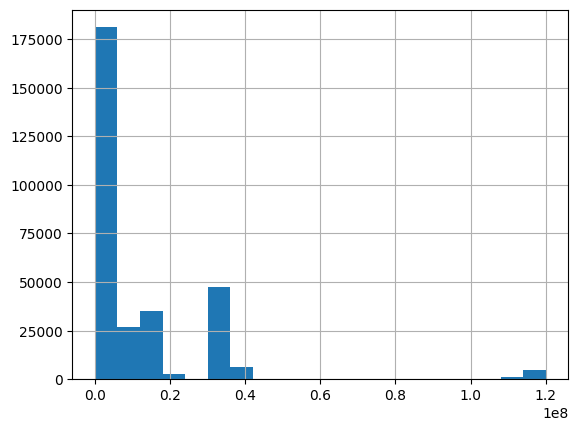

In [15]:
# Flow duration histogram
data_regular['Flow Duration'].hist(bins=20)

### Is The Situation the Same for Attack Data?

<Axes: >

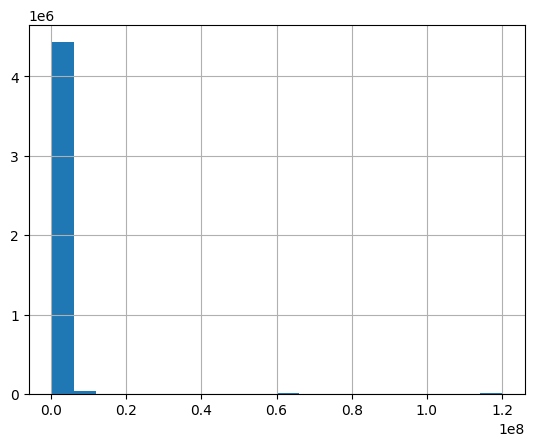

In [16]:
data_attacks['Flow Duration'].hist(bins=20)

In [17]:
data_attacks.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4509282 entries, 0 to 1821
Data columns (total 84 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Flow ID                     4509282 non-null  object 
 1   Src IP                      4509282 non-null  object 
 2   Src Port                    4509282 non-null  int64  
 3   Dst IP                      4509282 non-null  object 
 4   Dst Port                    4509282 non-null  int64  
 5   Protocol                    4509282 non-null  int64  
 6   Timestamp                   4509282 non-null  object 
 7   Flow Duration               4509282 non-null  int64  
 8   Total Fwd Packet            4509282 non-null  int64  
 9   Total Bwd packets           4509282 non-null  int64  
 10  Total Length of Fwd Packet  4509282 non-null  float64
 11  Total Length of Bwd Packet  4509282 non-null  float64
 12  Fwd Packet Length Max       4509282 non-null  float64
 13  Fwd P

In [18]:
len(data_attacks)

4509282

In [19]:
data_attacks.describe()

/home/goldy/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/goldy/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509278e+06,4.509282e+06,4.509256e+06,4.509256e+06,4.509256e+06,4.509256e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4509282.0,4509282.0,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4509282.0,4509282.0,4509282.0,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4509282.0,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06,4.509282e+06
mean,4.689097e+04,8.000555e+01,5.999974e+00,1.154218e+06,1.115977e+01,9.291205e+00,3.533157e+02,6.383945e+03,2.727607e+02,5.934448e-02,4.141006e+01,1.012321e+02,3.588650e+03,1.923810e-03,1.169301e+03,1.559331e+03,inf,inf,1.055359e+05,1.987099e+05,6.256682e+05,4.422472e+03,1.138980e+06,1.636103e+05,2.312965e+05,6.255297e+05,2.472273e+04,5.933581e+05,1.030447e+05,1.251322e+05,3.102795e+05,2.665269e+04,5.512755e+00,7.478233e-01,0.0,0.0,3.650414e+02,3.053018e+02,3.308761e+02,2.966853e+02,8.441255e-03,3.598875e+03,5.149381e+02,1.124864e+03,2.301832e+06,1.411666e+00,2.042421e+00,5.856502e-01,6.260578e+00,1.938883e+01,0.0,0.0,0.0,7.919250e-01,5.149381e+02,4.141006e+01,1.169301e+03,8.489598e+01,4.711834e+00,5.280324e+03,1.739962e+03,6.298236e-01,6.856903e+06,3.992210e-03,2.300322e+01,0.0,4.911169e+02,2.913852e+04,2.565009e+02,5.512332e+00,3.195733e+01,3.373974e+04,2.575959e+03,3.671914e+04,3.197435e+04,2.205683e+05,5.681982e+04,2.821409e+05,1.697801e+05
std,8.180247e+03,8.838885e+00,8.608293e-02,7.060879e+06,7.176771e+00,6.781392e+00,1.276530e+02,5.570624e+03,1.461341e+02,3.286233e+00,1.891878e+01,5.779379e+01,3.274655e+03,1.685270e+00,1.051104e+03,1.498380e+03,NaN,NaN,7.365890e+05,8.947782e+05,2.522510e+06,1.338721e+05,6.963656e+06,9.469151e+05,8.972195e+05,2.521314e+06,5.826614e+05,5.619680e+06,1.059935e+06,5.424120e+05,1.618331e+06,9.256562e+05,7.758229e+00,4.636028e-01,0.0,0.0,2.205018e+02,2.170592e+02,6.348475e+02,5.680698e+02,1.498822e+00,3.263500e+03,4.410675e+02,1.018093e+03,2.858989e+06,5.170609e-01,3.844286e-01,5.146646e-01,7.332745e+00,1.369593e+01,0.0,0.0,0.0,1.028544e-01,4.410675e+02,1.891878e+01,1.051104e+03,1.489652e+02,8.199682e+00,1.006678e+04,4.055383e+03,1.470818e+00,1.779

In [20]:
data_attacks.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.111.65-192.168.111.66-46126-80-6,192.168.111.65,46126,192.168.111.66,80,6,09/09/2021 05:05:46 PM,5992,7,6,363.0,11192.0,363.0,0.0,51.857143,137.201104,5792.0,0.0,1865.333333,2337.831702,1.928405e+06,2169.559413,499.333333,1230.749538,4359.0,6.0,5992.0,998.666667,1771.088215,4534.0,14.0,5468.0,1093.60,1844.761719,4359.0,29.0,1,1,0,0,232,200,1168.224299,1001.335113,0.0,5792.0,888.846154,1781.040138,3.172104e+06,1,2,1,2,12,0,0,0,0.857143,888.846154,51.857143,1865.333333,0,0,0,0,0,0,0,27,0,860,29200,235,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-Security2
1,192.168.111.65-192.168.111.66-46128-80-6,192.168.111.65,46128,192.168.111.66,80,6,09/09/2021 05:05:46 PM,5148,7,5,335.0,11192.0,335.0,0.0,47.857143,126.618098,5792.0,0.0,2238.400000,2559.789991,2.239122e+06,2331.002331,468.000000,1356.387187,4553.0,10.0,5148.0,858.000000,1853.319400,4638.0,43.0,4807.0,1201.75,2234.705853,4553.0,47.0,1,1,0,0,232,168,1359.751360,971.250971,0.0,5792.0,960.583333,1914.106792,3.663805e+06,0,2,1,2,11,0,0,0,0.714286,960.583333,47.857143,2238.400000,0,0,0,0,0,0,0,27,0,932,29200,235,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-Security2
2,192.168.111.65-192.168.111.66-46130-80-6,192.168.111.65,46130,192.168.111.66,80,6,09/09/2021 05:05:46 PM,4875,7,5,319.0,11192.0,319.0,0.0,45.571429,120.570667,5792.0,0.0,2238.400000,2559.789991,2.361231e+06,2461.538462,443.181818,1149.212149,3894.0,11.0,4875.0,812.500000,1565.370340,4000.0,45.0,4307.0,1076.75,1882.302026,3894.0,47.0,1,1,0,0,232,168,1435.897436,1025.641026,0.0,5792.0,959.250000,1914.587690,3.665646e+06,0,2,1,2,11,0,0,0,0.714286,959.250000,45.571429,2238.400000,0,0,0,0,0,0,0,26,0,932,29200,235,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-Security2
3,192.168.111.65-192.168.111.66-46132-80-6,192.168.111.65,46132,192.168.111.66,80,6,09/09/2021 05:05:46 PM,6116,7,5,397.0,11192.0,397.0,0.0,56.714286,150.051896,6848.0,0.0,2238.400000,2842.817757,1.894866e+06,1962.066710,556.000000,1565.293072,5268.0,6.0,6116.0,1019.333333,2161.146517,5427.0,30.0,5649.0,1412.25,2573.598308,5268.0,26.0,1,1,0,0,232,168,1144.538914,817.527796,0.0,6848.0,965.750000,2052.584983,4.213105e+06,0,2,1,2,11,0,0,0,0.714286,965.750000,56.714286,2238.400000,0,0,0,0,0,0,0,33,0,932,29200,235,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-Security2
4,192.168.111.65-192.168.111.66-46134-80-6,192.168.111.65,46134,192.168.111.66,80,6,09/09/2021 05:05:46 PM,6149,7,5,343.0,11192.0,343.0,0.0,49.000000,129.641814,5792.0,0.0,2238.400000,2559.789991,1.875915e+06,1951.536835,559.000000,1357.941678,4598.0,9.0,6149.0,1024.833333,1889.500401,4844.0,55.0,5734.0,1433.50,2159.053110,4598.0,54.0,1,1,0,0,232,168,1138.396487,813.140348,0.0,5792.0,961.250000,1913.870477,3.662900e+

In [21]:
data_attacks['Label'].value_counts()

Label
Hulk-Reqtimeout            855631
Hulk-NoDefense             851132
Hulk-Security2             813048
Hulk-Evasive               756987
TCPFlood-Reqtimeout        302687
TCPFlood-Evasive           302573
TCPFlood-Security2         296944
TCPFlood-NoDefense         291721
Slowloris-Reqtimeout         6782
Slowhttptest-Evasive         6692
Slowhttptest-NoDefense       6692
Slowhttptest-Security2       6688
Slowhttptest-Reqtimeout      5755
Slowloris-NoDefense          1783
Slowloris-Security2          1782
Slowloris-Evasive            1782
BENIGN                        603
Name: count, dtype: int64

In [22]:
# Protocol breakdown
data_attacks['Protocol'].value_counts()

Protocol
6     4508767
0         340
17        175
Name: count, dtype: int64

In [23]:
# Destination port analysis
data_attacks['Dst Port'].value_counts()

Dst Port
80      4508679
0           340
67           96
22           77
138          39
137          33
53            7
7680          5
3128          2
4660          2
443           2
Name: count, dtype: int64

In [24]:
# Are IP addresses for attack traffic less anonymized than the regular one?
data_attack_filt = data_attacks[(data_attacks['Src IP'] != '*.*.*.*') & (data_attacks['Dst IP'] != '*.*.*.*')]

len(data_attack_filt) / len(data_attacks)

0.9999172817313267

OK, so it seems like almost all attacking traffic has IP addresses, whereas most of regular traffic is anonymized via `*` and the majority has IP addresses indeed.

### Time Continuity Analysis


In [25]:
# Transform string time information into timestamp variables
data_regular['Timestamp'] = pd.to_datetime(data_regular['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
data_regular_tstamps = data_regular['Timestamp'].sort_values(ascending=False)

data_attacks['Timestamp'] = pd.to_datetime(data_attacks['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
data_attacks_tstamps = data_attacks['Timestamp'].sort_values(ascending=False)

In [26]:
# Compute span of the regular capture
regular_span = data_regular_tstamps.iloc[0] - data_regular_tstamps.iloc[-1]
regular_span

Timedelta('3 days 10:33:02')

In [27]:
regular_span * 0.01

Timedelta('0 days 00:49:31.820000')

In [28]:
# Are there gaps in the data (was the capture interrupted?)
def measure_real_capture_dur(data: pd.Series, gap_max_secs: int = 300) -> float:
    """Computes total timespan of the capture. Expects iterable containing timestamps objects sorted in a descending manner"""
    total_dur = pd.Timedelta(seconds=0)
    current_dur = pd.Timedelta(seconds=0)
    cont_durations = []
    last_tstamp = data.iloc[0]
    contiguous = True

    # Iterate through the dataframe to find out gaps
    for cur_tstamp in data:
        dur_gap = last_tstamp - cur_tstamp

        if dur_gap <= pd.Timedelta(seconds=gap_max_secs):
            total_dur += dur_gap
            current_dur += dur_gap
        else:
            cont_durations.append(current_dur)
            current_dur = pd.Timedelta(seconds=0)

            if contiguous:
                contiguous = False

        last_tstamp = cur_tstamp

    # Log the final continuous block and sort them via their length
    cont_durations.append(current_dur)
    cont_durations.sort(reverse=True)

    return total_dur, contiguous, cont_durations

In [29]:
# There are several more than 50-minute gaps in the regular traffic, this cannot be considered continous
measure_real_capture_dur(data_regular_tstamps, int(regular_span.total_seconds() * 0.01))

(Timedelta('2 days 18:53:37'),
 False,
 [Timedelta('0 days 21:56:22'),
  Timedelta('0 days 20:32:39'),
  Timedelta('0 days 12:22:54'),
  Timedelta('0 days 12:01:42')])

In [30]:
# Evaluate continuity of individual captures
for label in data_attacks['Label'].unique():
    # There are a few benign entries across attacks, drop them
    if label != 'BENIGN':
        attack_relevant_rows = data_attacks[data_attacks['Label'] == label]
        attack_relevant_tstamps = attack_relevant_rows['Timestamp']
        attack_relevant_tstamps = pd.to_datetime(attack_relevant_tstamps, format='%d/%m/%Y %I:%M:%S %p')
        attack_relevant_tstamps = attack_relevant_tstamps.sort_values(ascending=False)

        # According to the documentation, the capture should last 15 mins == 10 * 60 = 600 seconds

        # Evaluate continuity of the capture
        print(f'{label}\n{measure_real_capture_dur(attack_relevant_tstamps, 6)}\n')

Hulk-Security2
(Timedelta('0 days 00:09:51'), True, [Timedelta('0 days 00:09:51')])

Slowloris-Evasive
(Timedelta('0 days 00:00:07'), False, [Timedelta('0 days 00:00:07'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 

As we can see, most of these captures are continuous and last something below 10 minutes. Although there are a few gaps, we can still consider the capture as periodic.

In [31]:
del data_attacks
del data_regular

## Analyze train and test labels

For this purpose, we will mostly focus only on the label distribution, as more detailed analysis was performed in the previous cells.

In [32]:
PATH_TRAIN = '/data/datasets_cic/usb_ids/presplit/USB-IDS-1-TRAINING.csv'
PATH_TEST = '/data/datasets_cic/usb_ids/presplit/USB-IDS-1-TEST.csv'
PATH_VALID = '/data/datasets_cic/usb_ids/presplit/USB-IDS-1-VALIDATION.csv'

In [33]:
data_train = pd.read_csv(PATH_TRAIN)
data_test = pd.read_csv(PATH_TEST)
data_valid = pd.read_csv(PATH_VALID)

In [34]:
data_train['Label'].value_counts()

Label
Hulk-Reqtimeout            598939
Hulk-NoDefense             595790
Hulk-Security2             569131
Hulk-Evasive               529884
BENIGN                     213311
TCPFlood-Reqtimeout        211883
TCPFlood-Evasive           211801
TCPFlood-Security2         207862
TCPFlood-NoDefense         204200
Slowloris-Reqtimeout         4747
Slowhttptest-Evasive         4684
Slowhttptest-NoDefense       4684
Slowhttptest-Security2       4682
Slowhttptest-Reqtimeout      4028
Slowloris-NoDefense          1248
Slowloris-Security2          1247
Slowloris-Evasive            1247
Name: count, dtype: int64

In [35]:
data_test['Label'].value_counts()

Label
Hulk-Reqtimeout            128346
Hulk-NoDefense             127671
Hulk-Security2             121956
Hulk-Evasive               113552
BENIGN                      45708
TCPFlood-Reqtimeout         45405
TCPFlood-Evasive            45390
TCPFlood-Security2          44547
TCPFlood-NoDefense          43762
Slowloris-Reqtimeout         1017
Slowhttptest-Security2       1003
Slowhttptest-Evasive         1003
Slowhttptest-NoDefense       1003
Slowhttptest-Reqtimeout       863
Slowloris-Security2           267
Slowloris-NoDefense           267
Slowloris-Evasive             267
Name: count, dtype: int64

In [36]:
data_valid['Label'].value_counts()

Label
Hulk-Reqtimeout            128345
Hulk-NoDefense             127669
Hulk-Security2             121959
Hulk-Evasive               113549
BENIGN                      45720
TCPFlood-Reqtimeout         45397
TCPFlood-Evasive            45380
TCPFlood-Security2          44534
TCPFlood-NoDefense          43758
Slowloris-Reqtimeout         1017
Slowhttptest-Evasive         1003
Slowhttptest-NoDefense       1003
Slowhttptest-Security2       1002
Slowhttptest-Reqtimeout       863
Slowloris-Security2           267
Slowloris-NoDefense           267
Slowloris-Evasive             267
Name: count, dtype: int64

Is benign traffic still anonymized via `*` in train-test-valid subsets as well?

In [37]:
data_train[data_train['Label'] == 'BENIGN'].head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
3,*.*.*.*-192.168.111.66-64442-80-6,*.*.*.*,64442,192.168.111.66,80,6,07/06/2021 12:43:34 AM,30536093,37,28,537.0,111971.0,78.0,0.0,14.513514,30.464571,7240.0,0.0,3998.964286,2982.164544,3684.426819,2.128629,477126.453125,3.180477e+06,25036202.0,3.0,30536082.0,848224.500000,4.230422e+06,25036202.0,4.0,30536067.0,1.130965e+06,4.881273e+06,25079816.0,3.0,7,12,0,0,1192,904,1.211681,0.916948,0.0,7240.0,1730.892308,2775.983070,7.706082e+06,2,2,0,19,64,0,0,0,0.756757,1730.892308,14.513514,3998.964286,0,0,0,27386,5,24300354,0,8,0,1722,16060,227,7,32,5499861.0,0.0,5499861.0,5499861.0,25036202.0,0.0,25036202.0,25036202.0,BENIGN
8,*.*.*.*-192.168.111.66-55325-80-6,*.*.*.*,55325,192.168.111.66,80,6,06/06/2021 10:15:16 PM,15235818,20,16,309.0,56853.0,78.0,0.0,15.450000,31.703354,7240.0,0.0,3553.312500,3155.278640,3751.816936,2.362853,435309.085714,1.860938e+06,9968145.0,3.0,15235811.0,801884.789474,2.501030e+06,9968145.0,3.0,15235792.0,1.015719e+06,2.800159e+06,10011477.0,4.0,4,5,0,0,648,520,1.312696,1.050157,0.0,7240.0,1587.833333,2728.753598,7.446096e+06,2,2,0,9,35,0,0,0,0.800000,1587.833333,15.450000,3553.312500,0,0,0,22840,5,29207161,0,8,0,1579,16060,227,4,32,5267626.0,0.0,5267626.0,5267626.0,9968145.0,0.0,9968145.0,9968145.0,BENIGN
20,*.*.*.*-192.168.111.66-58852-80-6,*.*.*.*,58852,192.168.111.66,80,6,06/06/2021 12:49:53 AM,376060,39,59,232.0,199515.0,78.0,0.0,5.948718,20.876767,7240.0,0.0,3381.610169,2179.131755,531157.262139,260.596713,3876.907216,1.639922e+04,112488.0,4.0,376060.0,9896.315789,2.607017e+04,112488.0,4.0,375614.0,6.476103e+03,2.103077e+04,113235.0,4.0,3,18,0,0,1292,1896,103.706855,156.889858,0.0,7240.0,2038.234694,2365.970762,5.597818e+06,2,2,0,21,97,0,0,0,1.512821,2038.234694,5.948718,3381.610169,0,0,0,94171,27,1580607,0,2,0,2035,16060,227,3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
22,*.*.*.*-192.168.111.66-47433-80-6,*.*.*.*,47433,192.168.111.66,80,6,07/06/2021 06:40:28 AM,11219731,67,67,772.0,264473.0,78.0,0.0,11.522388,27.717382,7240.0,0.0,3947.358209,2715.609584,23640.941124,11.943245,84358.879699,6.138069e+05,5056111.0,3.0,11219721.0,169995.772727,8.700741e+05,5056111.0,4.0,11219702.0,1.699955e+05,8.703728e+05,5099684.0,4.0,10,25,0,0,2176,2152,5.971623,5.971623,0.0,7240.0,1979.440299,2749.862557,7.561744e+06,2,2,0,35,133,0,0,0,1.000000,1979.440299,11.522388,3947.358209,0,0,0,31662,7,5546796,0,5,0,1973,16060,227,10,32,6163591.0,0.0,6163591.0,6163591.0,5056111.0,0.0,5056111.0,5056111.0,BENIGN
46,*.*.*.*-192.168.111.66-28485-80-6,*.*.*.*,28485,192.168.111.66,80,6,06/06/2021 12:26:45 PM,10387959,30,21,531.0,80559.0,78.0,0.0,17.700000,32.642420,7240.0,0.0,3836.142857,3005.077075,7806.153259,4.909530,207759.180000,9.883354e+05,500